# Assignment 3 - Linear Regression

In this assignment, we will be building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


Complete the following:

**Data Preparation**

**Question 1** _(3 points)_
* Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

**Question 2** _(3 points)
* Create a new column which captures the age of the car as 'new' or 'old'.

**Question 3** _(3 points)
* Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

**Exploratory Analysis**

**Question 4** _(3 points)_
* Conduct exploratory analysis for the categorical variables. What are you findings?

**Question 5** _(10 points)_
* Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?


**Regression Model**

**Question 6** _(1 point)_
* Based on the insights identified, state a hypothesis which you can test with a regression model.  

**Question 7** _(5 points)_
* Build a linear regression model based on your hypothesis. Interpret the results.

**Question 8** _(2 points)_
* How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv(r'C:\Users\User\Desktop\car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Question 1 Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

In [83]:
df['Fuel_Type_Variables'] = df.Fuel_Type.map({'Petrol':0, 'Diesel':1})
df['Transmission_Variables'] = df.Transmission.map({'Manual':0, 'Automatic':1})
df['Seller_Type_Variables'] = df.Seller_Type.map({'Dealer':0, 'Individual':1})

In [84]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_Variables,Transmission_Variables,Seller_Type_Variables
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.0,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1.0,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.0,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.0,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1.0,0,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0.0,0,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0.0,0,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.0,0,0


Question 2 Create a new column which captures the age of the car as 'new' or 'old'.

In [85]:
def status(df):
    if df['Owner']==0:
        return 'new'
    else:
        return 'old'

In [86]:
df['Age'] = df.apply(status, axis=1)

In [87]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
  display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_Variables,Transmission_Variables,Seller_Type_Variables,Age
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0,0.0,0,0,new
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0,1.0,0,0,new
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0,0.0,0,0,new
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0,0.0,0,0,new
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0,1.0,0,0,new
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0,1.0,0,0,new
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0,0.0,0,0,new
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0,1.0,0,0,new
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0,1.0,0,0,new
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0,1.0,0,0,new


Question 3 Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

In [88]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Variables,Transmission_Variables,Seller_Type_Variables
count,301.000000,301.000000,301.000000,301.000000,301.000000,299.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.200669,0.132890,0.352159
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.401172,0.340021,0.478439
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,0.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000


In [89]:
#Python Data Scaling – Standardization
cols = ['Kms_Driven', 'Selling_Price', 'Present_Price']

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
std_scaler = StandardScaler()

In [92]:
Stand_Sc = std_scaler.fit_transform(df[cols].iloc[:,range(0,3)].values)

<AxesSubplot:ylabel='Density'>

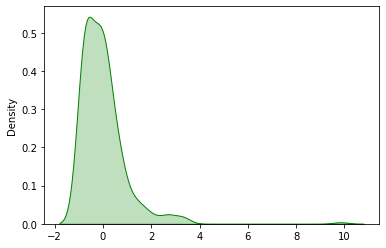

In [93]:
sns.kdeplot(Stand_Sc[:,2],fill=True, color = 'Green')

Question 4 Conduct exploratory analysis for the categorical variables. What are you findings?

In [94]:
obj_cols = df.select_dtypes(object).columns.values.tolist()
num_cols = df.select_dtypes(np.number).columns.values.tolist()

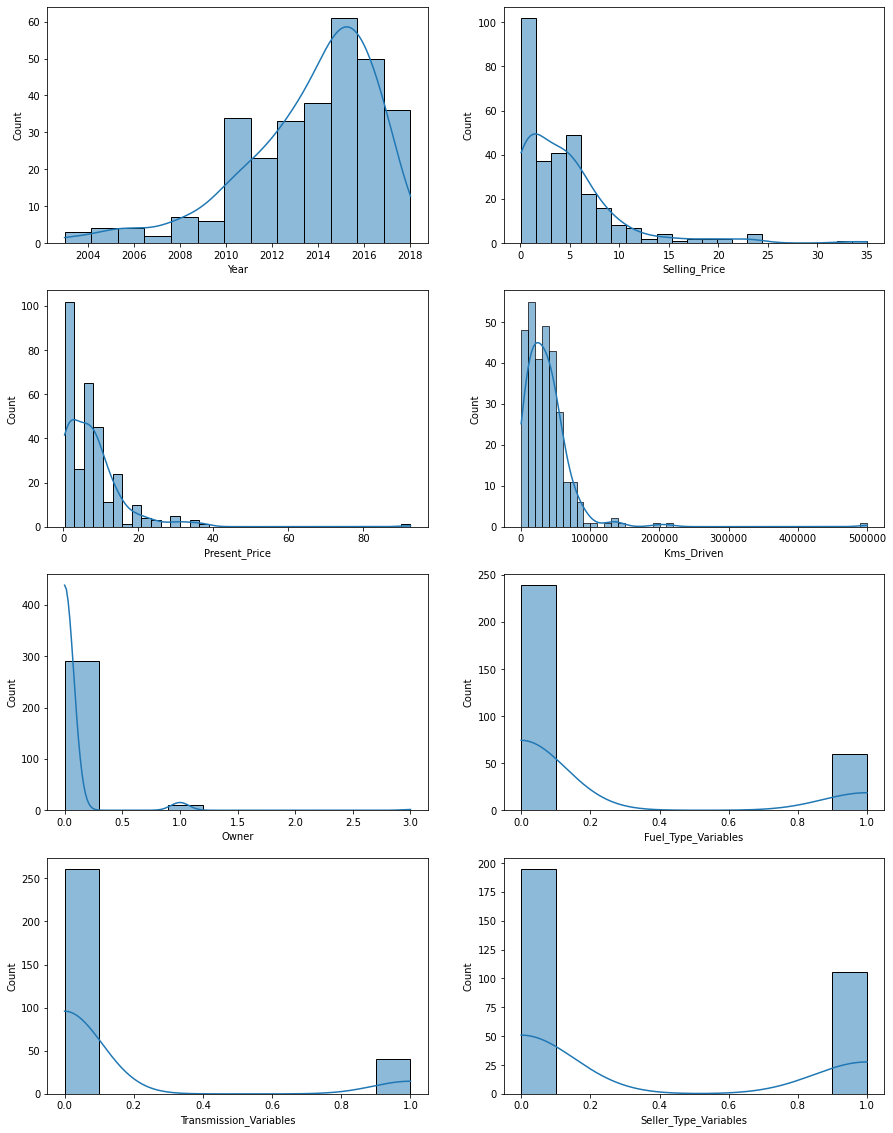

In [95]:
fig = plt.figure(figsize=[15, 20])
for col in range(len(num_cols)):
    plt.subplot(4,2,col+1)
    sns.histplot(x=num_cols[col], data=df, kde=True)

The normality test shows that  all of numerical variables are not normal.

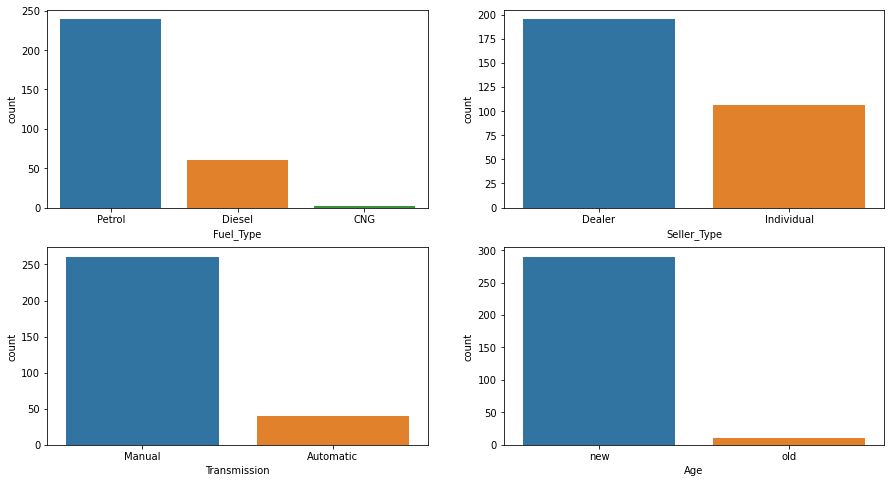

In [96]:
obj_cols.remove('Car_Name')
fig = plt.figure(figsize=[15,8])
for col in range(len(obj_cols)):
    plt.subplot(2,2,col+1)
    sns.countplot(x=obj_cols[col], data=df)

There are more petrol than Diesel than CNG, more Dealer than Individual, more Manual than Automatic and more New than Old.

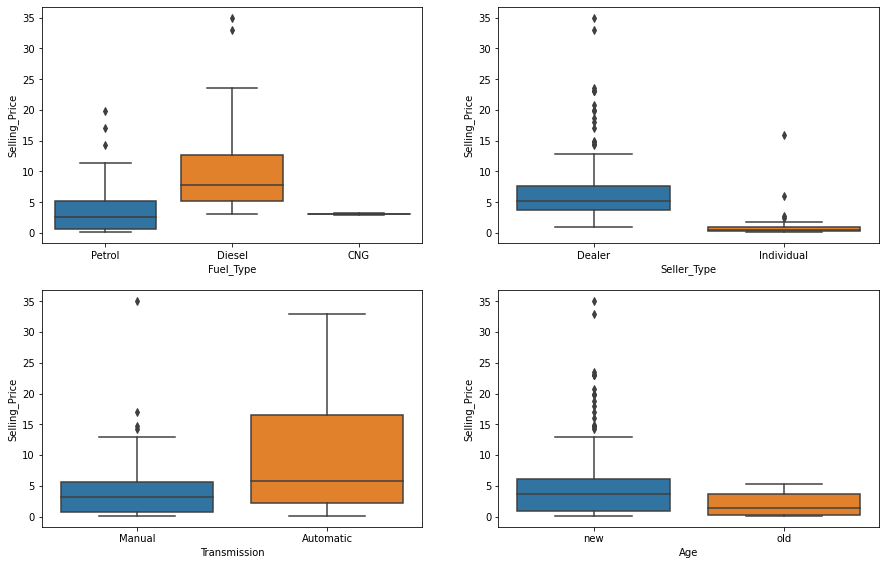

In [97]:
fig = plt.figure(figsize=[15, 20])
for col in range(len(obj_cols)):
    plt.subplot(4,2,col+1)
    sns.boxplot(x=obj_cols[col], y='Selling_Price', data=df)

Generally speaking, the selling price of Diesel is higher than Petrol, Dealer higher than Individual, Automatic higher than Manual and New higher than Old.

Text(0.5, 1.0, 'Car Brands vs Selling Price')

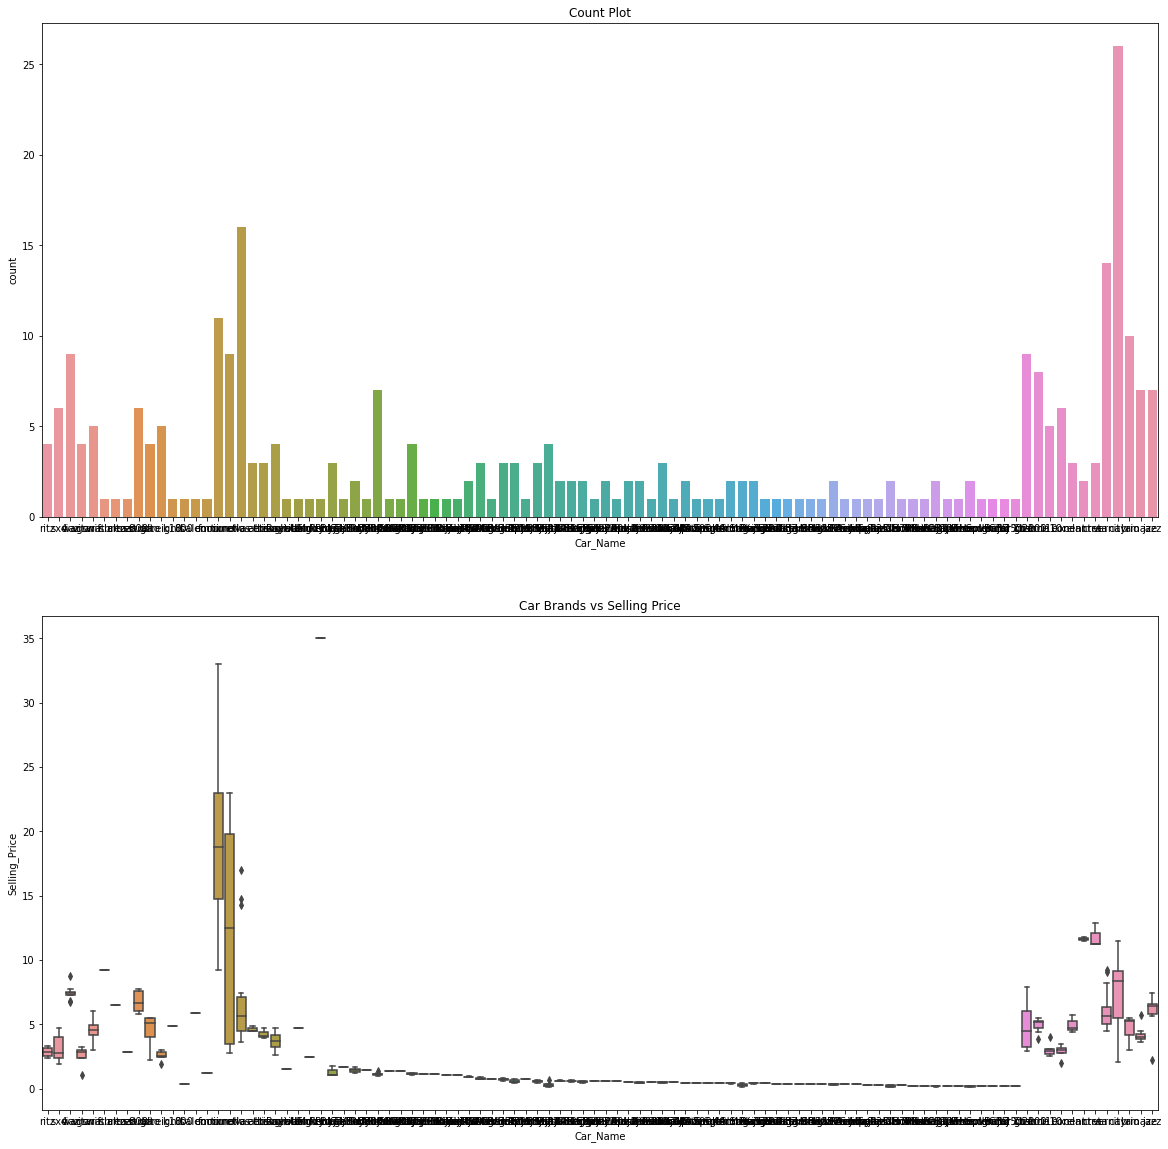

In [76]:
fig, ax = plt.subplots(2,1, figsize=[20, 20])
sns.countplot(ax = ax[0], x='Car_Name', data=df).set_title('Count Plot')
sns.boxplot(ax = ax[1], x='Car_Name', y='Selling_Price', data=df).set_title('Car Brands vs Selling Price')

Several brands have higher prices compared to other brands.

Question 5 Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?

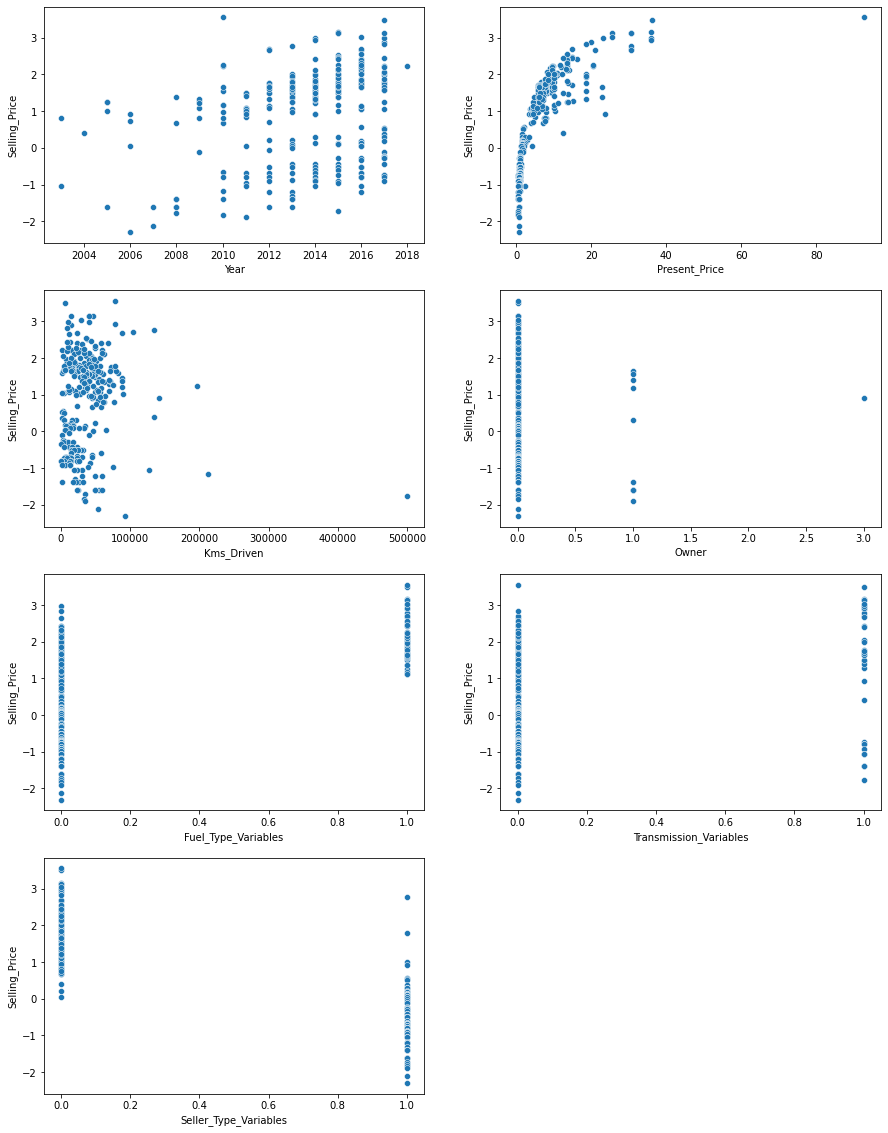

In [99]:
num_cols.remove('Selling_Price')
fig = plt.figure(figsize=[15, 20])
for col in range(len(num_cols)):
    plt.subplot(4,2,col+1)
    sns.scatterplot(x=num_cols[col], y=np.log(df['Selling_Price']), data=df)

The above plot shows very weak relationship between selling_price and km_driven.

The more recent the year is, the selling_price range is higher.

In [100]:
num_cols.append('Selling_Price')

<AxesSubplot:>

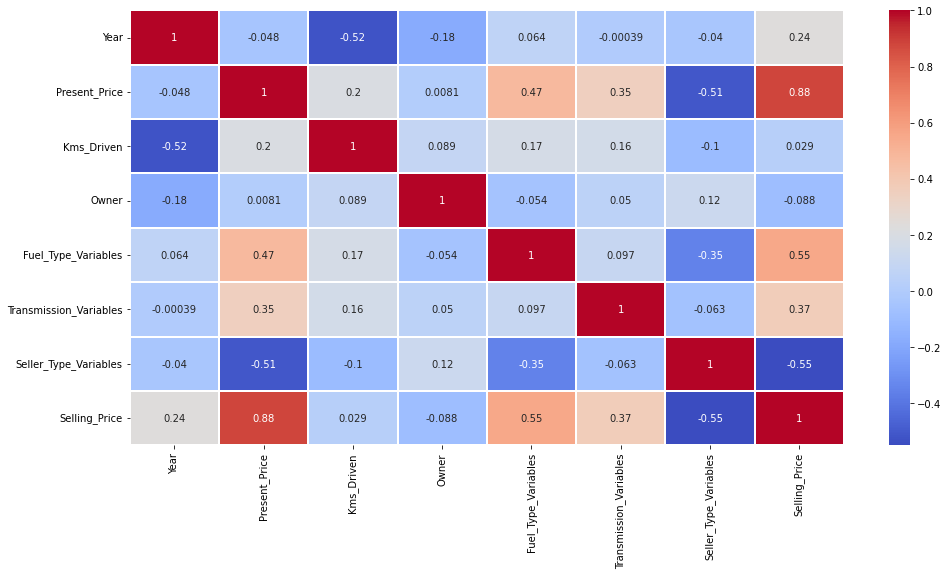

In [101]:
plt.figure(figsize=(16,8))
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=2, cmap= 'coolwarm')

The above heatmap shows that the correlation between present_price and selling_price is very high, So there is no need to retain both as they both will be showing same effect. So we can drop present_price. The correlation of Owner is very weak which can also be dropped.

Question 6 Based on the insights identified, state a hypothesis which you can test with a regression model

Based on the insights identified, we can assume that selling price is corrleated with the types of the cars and we will test with a regression model.

Question 7 Build a linear regression model based on your hypothesis. Interpret the results.

In [292]:
data_dummies = pd.get_dummies(df, drop_first=True)

In [293]:
data_dummies = data_dummies.drop(data_dummies[data_dummies['Kms_Driven'] > 600000].index).reset_index(drop=True)

In [294]:
data_dummies.dropna(inplace=True)

In [295]:
data_dummies.isnull().mean().round(4).mul(100).sort_values(ascending=False).head()

Year                      0.0
Car_Name_eon              0.0
Car_Name_dzire            0.0
Car_Name_creta            0.0
Car_Name_corolla altis    0.0
dtype: float64

In [296]:
y = data_dummies['Selling_Price']
x = data_dummies.drop('Selling_Price', axis=1)

In [297]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [298]:
y_train = np.log(y_train)

In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
Lr = LinearRegression()

In [300]:
Lr.fit(x_train, y_train)

LinearRegression()

In [301]:
Lr.score(x_train, y_train)

0.9928071081992228

Question 8 How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [306]:
yPred = Lr.predict(x_train)

In [307]:
r2_score(yPred, y_train)

0.9927549956669646